In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rankings_file_path = "../../data/Daily_Ranking.csv"
df = pd.read_csv(rankings_file_path)

In [11]:
Track_name = "Despacito - Remix"
df_data = df[df["Track Name"] == Track_name]

df_data = df_data[df_data["Date"].isin(["2017-04-25","2017-06-25","2017-07-25","2017-08-25","2017-09-25"])]

df_data = df_data[df_data["Region"].isin(["ar","au","br","ca","cl","co","cr","do","fi","de","is","it","mx","nz","no","pe","ph","pt","sg","tw","tr","gb","us"])]

df_data = df_data.drop(columns=['Position', 'Artist', 'URL', 'Track Name'])
df_data

,Streams,Date,Region
171174,238474,2017-04-25,ar
182781,120687,2017-06-25,ar
188779,82887,2017-07-25,ar
195005,61155,2017-08-25,ar
201241,27170,2017-09-25,ar
245362,97389,2017-04-25,fi
256960,68471,2017-06-25,fi
262952,56918,2017-07-25,fi
269167,41432,2017-08-25,fi
275425,14253,2017-09-25,fi


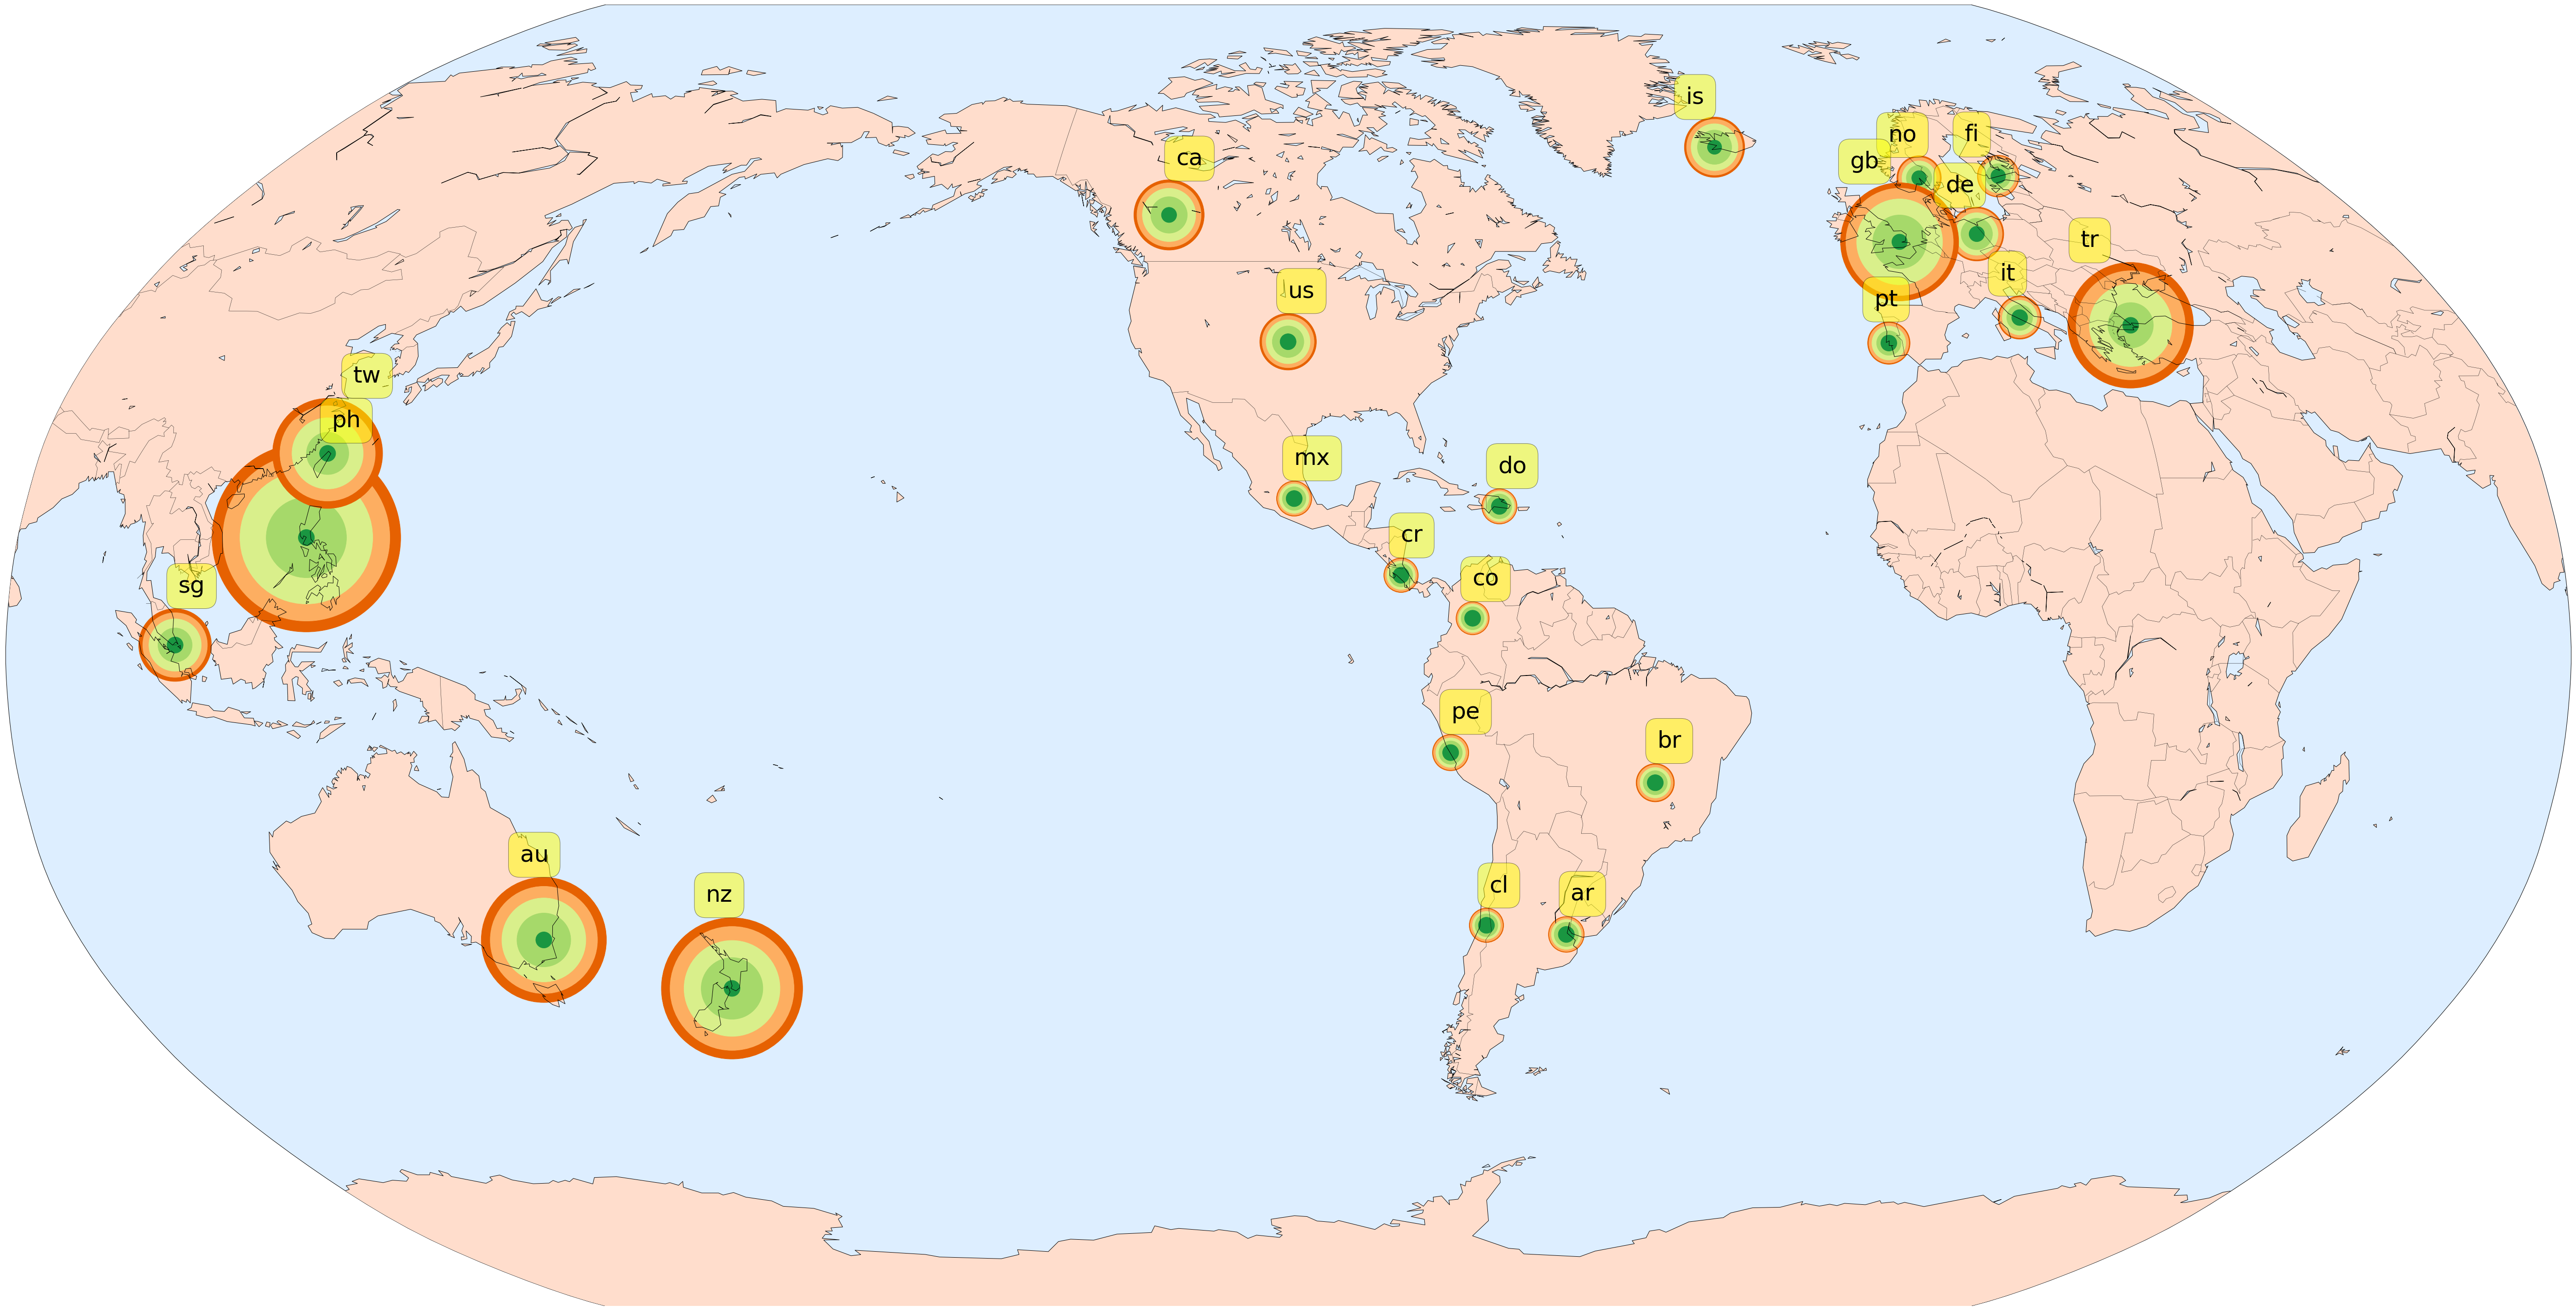

In [24]:
plt.figure(figsize = (100,80))
m = Basemap(projection='robin',lat_0=0, lon_0=-100,
              resolution='c', area_thresh=1000.0)
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcountries()
m.drawcoastlines()
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')

longitudes, latitudes = [], []
coordinates = pd.read_csv("country-lats.csv")
ax = plt.gca()

for i in range(23):
    x = coordinates['Lon'][i]
    y = coordinates['Lat'][i]
    cName = coordinates['Country Name'][i]
    data1 = int(df_data[(df_data["Region"] == cName) & (df_data["Date"] == "2017-04-25")]["Streams"])
    data2 = int(df_data[(df_data["Region"] == cName) & (df_data["Date"] == "2017-06-25")]["Streams"])
    data3 = int(df_data[(df_data["Region"] == cName) & (df_data["Date"] == "2017-07-25")]["Streams"])
    data4 = int(df_data[(df_data["Region"] == cName) & (df_data["Date"] == "2017-08-25")]["Streams"])
    data5 = int(df_data[(df_data["Region"] == cName) & (df_data["Date"] == "2017-09-25")]["Streams"])
    normalizer = data1
    r1 = data1/float(normalizer)
    r2 = (data1+data2)/float(normalizer)
    r3 = (data1+data2+data3)/float(normalizer)
    r4 = (data1+data2+data3+data4)/float(normalizer)
    r5 = (data1+data2+data3+data4+data5)/float(normalizer)
    Lon,Lat = m(x,y)
    Lo2,La2 = m(x,y+r1)
    Lo3,La3 = m(x,y+r2)
    Lo4,La4 = m(x,y+r3)
    Lo5,La5 = m(x,y+r4)
    Lo7,La7 = m(x,y+r5)
    
    
    circle1 = plt.Circle((Lon, Lat), La2-Lat, color='#1a9641',fill=True)
    Lo6,La6 = m(x,y+r5+2)
    plt.annotate(
        coordinates['Country Name'][i], 
        xy = (Lon, Lat), xytext = (Lo6,La6),
        #textcoords = 'offset points', ha = 'right', va = 'bottom',
        fontsize=50,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    circle2 = plt.Circle((Lon, Lat), La3-Lat, color='#a6d96a',fill=True)
    circle3 = plt.Circle((Lon, Lat), La4-Lat, color='#d9ef8b',fill=True)
    circle4 = plt.Circle((Lon, Lat), La5-Lat, color='#fdae61',fill=True)
    circle5 = plt.Circle((Lon, Lat), La7-Lat, color='#e66101',fill=True)
    ax.add_patch(circle5)
    ax.add_patch(circle4)
    ax.add_patch(circle3)
    ax.add_patch(circle2)
    ax.add_patch(circle1)

plt.show()